# From Single layer Percetrons to Multi-layer neural networks

### Outline
* Multi-layer structure
* Activation functions
* Back-Propagation Algorithm
* Tips
* Stepping through Theano, Lasagne and NoLearn

# Multi-layer structure
![Multi-layer neural network](http://ufldl.stanford.edu/tutorial/images/Network3322.png)
Source: http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/

# Activation functions
* Choose an activation function which has a simple derivative

## Sigmoid function

$$ f(x) = \frac{1}{1+e^{-x}} $$

$$ f'(x) = f(x) (1-f(x)) $$

/Users/hannes/.virtualenvs/hackoregon/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(-5.0, 5.0)

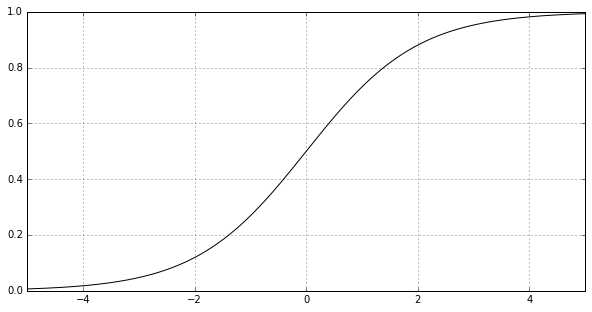

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
f = 1/(1+np.exp(-(x))) # +0.1 to avoid dividing by 0
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.grid()
plt.plot(x, f, color='black')
plt.xlim(x.min(), x.max())

## Hyperbolic tangent function

$$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

$$ f(x) = 2 * \frac{1}{1+e^{-2x}} - 1$$

$$ f'(x) = 1 - f(x)^2$$

/Users/hannes/.virtualenvs/hackoregon/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(-5.0, 5.0)

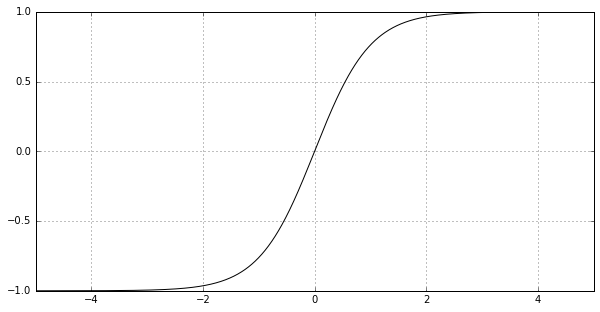

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
f = 2/(1+np.exp(-(2*x)))-1 # +0.1 to avoid dividing by 0
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.grid()
plt.plot(x, f, color='black')
plt.xlim(x.min(), x.max())

* [Great comparison of activation functions](https://en.wikipedia.org/wiki/Activation_function)

# Backpropagation Algorithm

1. Compute forward pass by calculating the activations for $a^{(2)}$ and $a^{(3)}$
2. Calculate the cost function $$ J(w) = \frac{1}{2}(a^{(3)} - y)^2$$
3. Calculate the errors $$ \delta^{(3)} = a^{(3)} - y $$
4. Calculate the error for the hidden layer $$ \delta^{(2)} = (W^{(2)})^T \delta^{(3)} * \frac{\delta \phi (z^{(2)})}{\delta z^{(2)}}$$
Interestingly, $$ \frac{\delta \phi (z^{(2)})}{\delta z^{(2)}} = (a^{(2)} \dot (1-a^{(2)}))$$ 

5. Calculate the change of the weights
$$ \Delta^{(l)}_{i,j} = \Delta^{(l)}_{i,j} + a^{(l)}_{j} \delta^{(l+1)}_{i}$$
6. Update the weights
$$ W^{(l)} = W^{(l)} - \eta \Delta^{(l)} $$

# Tools to calculate neural networks

 * Theano: Symbolic computation library for Python (Cuda support)
 * Lasagne: Neural network library based on Theano
 * NoLearn: Python wrapper for Lasagne


## NoLearn
In NoLearn, you can define the network layers as a Python list

```
layers = [
    (InputLayer, {'shape': (1, X.shape[1],)}),
    (DenseLayer, {'num_units': 2, 'nonlinearity': sigmoid}),
    (DenseLayer, {'num_units': 2, 'nonlinearity': softmax}),
]
```

and pass it to the neural network definition
```
net1 = NeuralNet(
    layers=layers,
    max_epochs=100,
    update_learning_rate=1,
    train_split=TrainSplit(eval_size=0),
    verbose=3,
)
```

Use `net.fit(X, y)` and `net.predict(X)` to train and for your prediction, respectively.

# XOR prediction with a Multi-layer neural network

In [1]:
import numpy as np

from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.nonlinearities import softmax, sigmoid

from nolearn.lasagne import TrainSplit
from nolearn.lasagne import NeuralNet

data_set = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
])

X = data_set[:, :2]
y = data_set[:, 2:]
X = np.array(X).astype(np.float32)
y = np.array(y).ravel().astype(np.int32)

layers = [
    (InputLayer, {'shape': (1, X.shape[1],)}),
    (DenseLayer, {'num_units': 2, 'nonlinearity': sigmoid}),
    (DenseLayer, {'num_units': 2, 'nonlinearity': softmax}),
]

net1 = NeuralNet(
    layers=layers,
    max_epochs=100,
    update_learning_rate=1,
    train_split=TrainSplit(eval_size=0),
    verbose=1,
)
net1.fit(X, y)

/Users/hannes/.virtualenvs/hackoregon/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


# Neural Network with 12 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0       2
  1  dense1       2
  2  dense2       2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.87205           nan          nan          nan  0.00s
      2       0.72579           nan          nan          nan  0.00s
      3       0.72503           nan          nan          nan  0.00s
      4       0.69634           nan          nan          nan  0.00s
      5       0.69443           nan          nan          nan  0.00s
      6       0.69434           nan          nan          nan  0.00s
      7       0.69389           nan          nan          nan  0.00s
      8       0.69376           nan          nan          nan  0.00s
      9       0.69366           nan          nan          nan  0.00s
     10       0.69356           nan          nan          nan  0.00s
    

/Users/hannes/.virtualenvs/hackoregon/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


     89       0.09739           nan          nan          nan  0.00s
     90       0.08164           nan          nan          nan  0.00s
     91       0.06865           nan          nan          nan  0.00s
     92       0.05802           nan          nan          nan  0.00s
     93       0.04936           nan          nan          nan  0.00s
     94       0.04232           nan          nan          nan  0.00s
     95       0.03658           nan          nan          nan  0.00s
     96       0.03189           nan          nan          nan  0.00s
     97       0.02804           nan          nan          nan  0.00s
     98       0.02486           nan          nan          nan  0.00s
     99       0.02222           nan          nan          nan  0.00s
    100       0.02001           nan          nan          nan  0.00s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10d1b1950>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10d1b1810>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (1, 2)}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 2, 'nonlinearity': <function sigmoid at 0x10cd240c8>}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 2, 'nonlinearity': <function softmax at 0x10cd24140>})],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10d101500>,
     objective_loss_function=<function categorical_crossentropy at 0x10ced5c08>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x10d1b92d8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x10d1b94d0>],
     regression=False,
     train_split=<nolearn.l

In [3]:
# Test the model by predicting the output for (1, 1)
net1.predict([[1, 1],])

array([0])

# Credit card approval prediction

In [31]:
# data from https://onlinecourses.science.psu.edu/stat857/node/215
import pandas as pd
import numpy as np
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.nonlinearities import softmax, tanh

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit

training_set = pd.read_csv('../../data/German_credit_card_training_500.csv')
training_set = training_set.sort_values(
    ['Creditability',]).head(
    2 * len(training_set[(training_set['Creditability'] == 0)])
)
# test_set = pd.read_csv('german_credit_dataset/Test50.csv')
# extract the creditability column as y vector
y = training_set['Creditability'].values
# drop the creditability column from the dataset
training_set.drop('Creditability', axis=1, inplace=True)

# remaining dataset is used as input matrix
X = np.array(training_set.values).astype(np.float32)
y = np.array(y).astype(np.int32)

# apply some very simple normalization to the data
X -= X.mean()
X /= X.std()

credit_approval_net = NeuralNet(
    layers=[  # three layers: one hidden layer
        (InputLayer, {'shape': (None, X.shape[1],)}),
        (DenseLayer, {'num_units': 10, 'nonlinearity': tanh}),
        (DenseLayer, {'num_units': 2, 'nonlinearity': softmax}),
        ],
    update_learning_rate=0.1,
    max_epochs=50,  # we want to train this many epochs
    verbose=2,
    train_split=TrainSplit(eval_size=0.1),
    )

credit_approval_net.fit(X, y)

# Neural Network with 242 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0      21
  1  dense1      10
  2  dense2       2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.39193       1.04366      1.33371      0.50000  0.00s
      2       1.40495       0.76525      1.83593      0.50000  0.00s
      3       1.01959       0.67230      1.51657      0.50000  0.00s
      4       0.92824       0.64318      1.44320      0.63333  0.00s
      5       0.89540       0.64808      1.38163      0.53333  0.00s
      6       0.93064       0.64499      1.44289      0.53333  0.00s
      7       0.93423       0.63382      1.47396      0.63333  0.00s
      8       0.90012       0.63156      1.42523      0.56667  0.00s
      9       0.88556       0.62469      1.41760      0.56667  0.00s
     10       0.86888       0.61199      1.41976      0.63333  0.00s
   

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10d1b1950>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10d1b1810>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 21)}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 10, 'nonlinearity': <function tanh at 0x10cd241b8>}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 2, 'nonlinearity': <function softmax at 0x10cd24140>})],
     loss=None, max_epochs=50, more_params={},
     objective=<function objective at 0x10d101500>,
     objective_loss_function=<function categorical_crossentropy at 0x10ced5c08>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x1103e8200>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x1103c6d40>],
     regression=False,
     train_split=<nolearn.

In [28]:
# determine score on test set
training_set = pd.read_csv('../../data/German_credit_card_test_500.csv')
training_set = training_set.sort_values(
    ['Creditability',]).head(
    2 * len(training_set[(training_set['Creditability'] == 0)])
)
# test_set = pd.read_csv('german_credit_dataset/Test50.csv')
# extract the creditability column as y vector
y_test = training_set['Creditability'].values
# drop the creditability column from the dataset
training_set.drop('Creditability', axis=1, inplace=True)

# remaining dataset is used as input matrix
X_test = np.array(training_set.values).astype(np.float32)
y_test = np.array(y_test).astype(np.int32)

# apply some very simple normalization to the data
X_test -= X_test.mean()
X_test /= X_test.std()

# run test set with test data
credit_approval_net.score(X_test, y_test)

0.8949044585987261

## Classify hand-written numbers

In [59]:
import cPickle, gzip, numpy

# Load the dataset
f = gzip.open('../../data/mnist.pkl.gz', 'rb')
training_set, valid_set, test_set = cPickle.load(f)
f.close()

In [60]:
X_train = training_set[0]
y_train = training_set[1]
X_test = test_set[0]
y_test = test_set[1]

Populating the interactive namespace from numpy and matplotlib


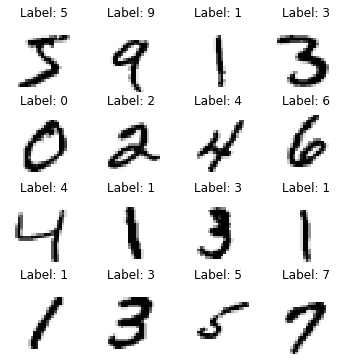

In [67]:
import matplotlib
import matplotlib.pyplot as plt
%pylab inline

def get_images(training_set):
    """ Return a list containing the images from the MNIST data
    set. Each image is represented as a 2-d numpy array.
    
    source: https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/fig/mnist.py
    """
    flattened_images = training_set[0]
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. """
    figs, axes = plt.subplots(4, 4, figsize=(6, 6))
    for i in range(4):
        for j in range(4):
            axes[i, j].imshow(-X_train[i + 4 * j].reshape(28, 28), cmap='gray', interpolation='none')
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            axes[i, j].set_title("Label: {}".format(y[i + 4 * j]))
            axes[i, j].axis('off')
    
images = get_images(training_set)
plot_10_by_10_images(images)

In [45]:
import pandas as pd
import numpy as np
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.nonlinearities import softmax, tanh

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit

X = X_train.astype(np.float32)
y = y_train.astype(np.int32)

# apply some very simple normalization to the data
X -= X.mean()
X /= X.std()

mnist_net = NeuralNet(
    layers=[  # three layers: one hidden layer
        (InputLayer, {'shape': (None, X.shape[1], )}),
        (DenseLayer, {'num_units': 50, 'nonlinearity': sigmoid}),
        (DenseLayer, {'num_units': 10, 'nonlinearity': softmax}),
        ],
    update_learning_rate=0.1,
    max_epochs=5,  # we want to train this many epochs
    verbose=2,
    train_split=TrainSplit(eval_size=0.25),
    )

mnist_net.fit(X, y)

# Neural Network with 39760 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0     784
  1  dense1      50
  2  dense2      10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.39082       0.22913      1.70565      0.93354  0.54s
      2       0.19555       0.17811      1.09797      0.94737  0.65s
      3       0.15028       0.15636      0.96113      0.95204  0.51s
      4       0.12384       0.14538      0.85181      0.95535  0.63s
      5       0.10512       0.13777      0.76300      0.95662  0.59s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10d1b1950>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10d1b1810>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 784)}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 50, 'nonlinearity': <function sigmoid at 0x10cd240c8>}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 10, 'nonlinearity': <function softmax at 0x10cd24140>})],
     loss=None, max_epochs=5, more_params={},
     objective=<function objective at 0x10d101500>,
     objective_loss_function=<function categorical_crossentropy at 0x10ced5c08>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x1103bc878>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x110c48878>],
     regression=False,
     train_split=<nole

In [46]:
mnist_net.score(X_test, y_test)

0.9053

# Tips

* [Effective Backpropagation, pdf](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
* [Comparison of activation functions](https://en.wikipedia.org/wiki/Activation_function)
* [Introduction to Theano](http://on-demand.gputechconf.com/gtc/2015/webinar/deep-learning-course/getting-started-with-theano.pdf)